# Imports

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%pwd

'D:\\projects\\WGAN\\GeneratingFaces'

In [2]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
from fastai.vision.gan import *

In [3]:
path = Path('C:/Users/jpatn/data/celeba-dataset/img_align_celeba/')

# Data

In [12]:
def get_data(bs,size):
    return (GANItemList.from_folder(path, noise_sz=100)
               .no_split()
               .label_from_func(noop)
               .transform(tfms=[[crop_pad(size=size, row_pct=(0,1), col_pct=(0,1))], []], 
                          size=size, tfm_y=True)
               .databunch(bs=bs)
               .normalize(stats = [torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])], 
                          do_x=False, do_y=True))

In [13]:
data = get_data(128,64)

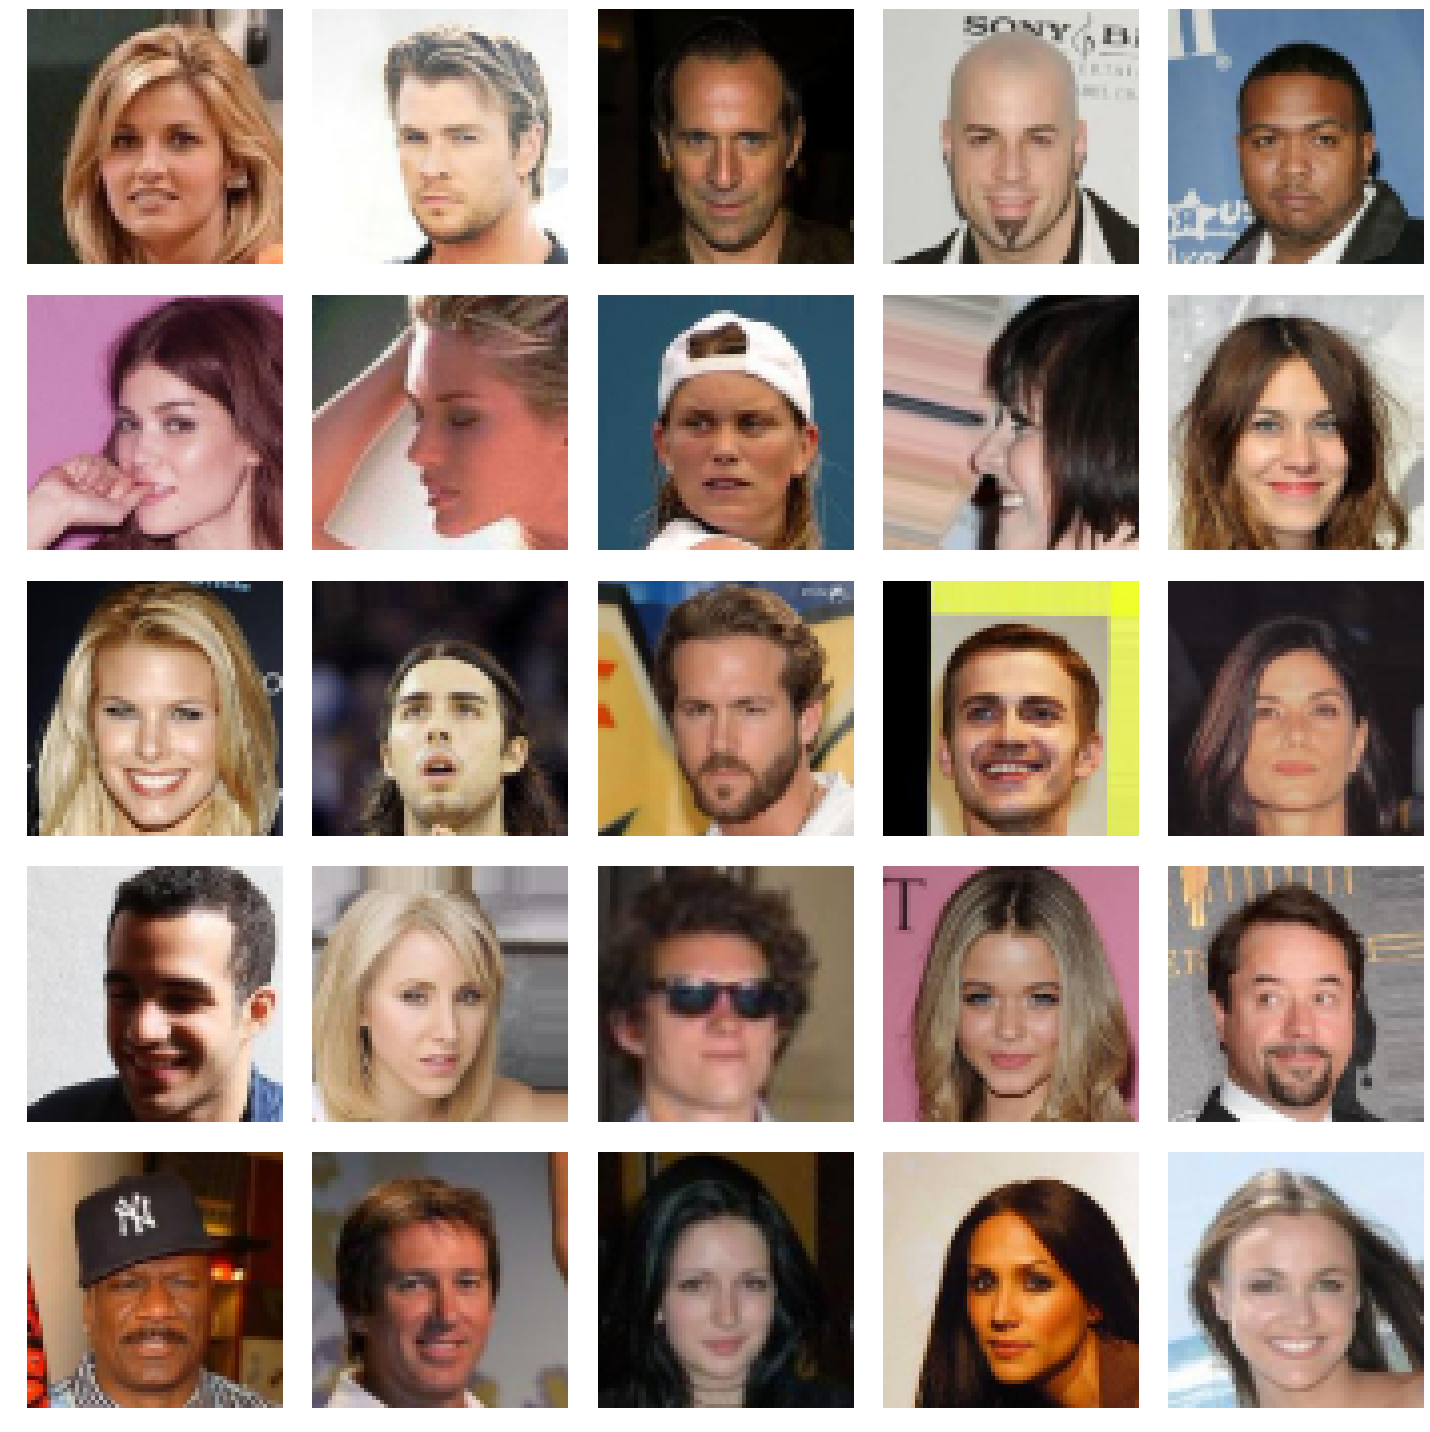

In [14]:
data.show_batch(rows=5)

# W1

## model

In [15]:
generator = basic_generator(in_size=64, n_channels=3, n_extra_layers=1, self_attention=True)
critic    = basic_critic   (in_size=64, n_channels=3, n_extra_layers=1)

In [19]:
learn = GANLearner.wgan(data, generator, critic, switch_eval=False,
                        path='D:/projects/WGAN/GeneratingFaces/',
                        opt_func = partial(optim.Adam, betas = (0.,0.99)), 
                        wd=0.)

## Train 1

epoch,train_loss,gen_loss,disc_loss
1,-1.089357,0.736150,-1.441125
2,-1.107290,0.665599,-1.465957
3,-0.772354,0.570717,-1.062177
4,-0.697733,0.483068,-0.913992
5,-0.614366,0.477618,-0.838177
6,-0.580641,0.452284,-0.798879
7,-0.561331,0.426715,-0.749216
8,-0.486686,0.388376,-0.666383
9,-0.435308,0.344354,-0.603801
10,-0.439955,0.314348,-0.579404


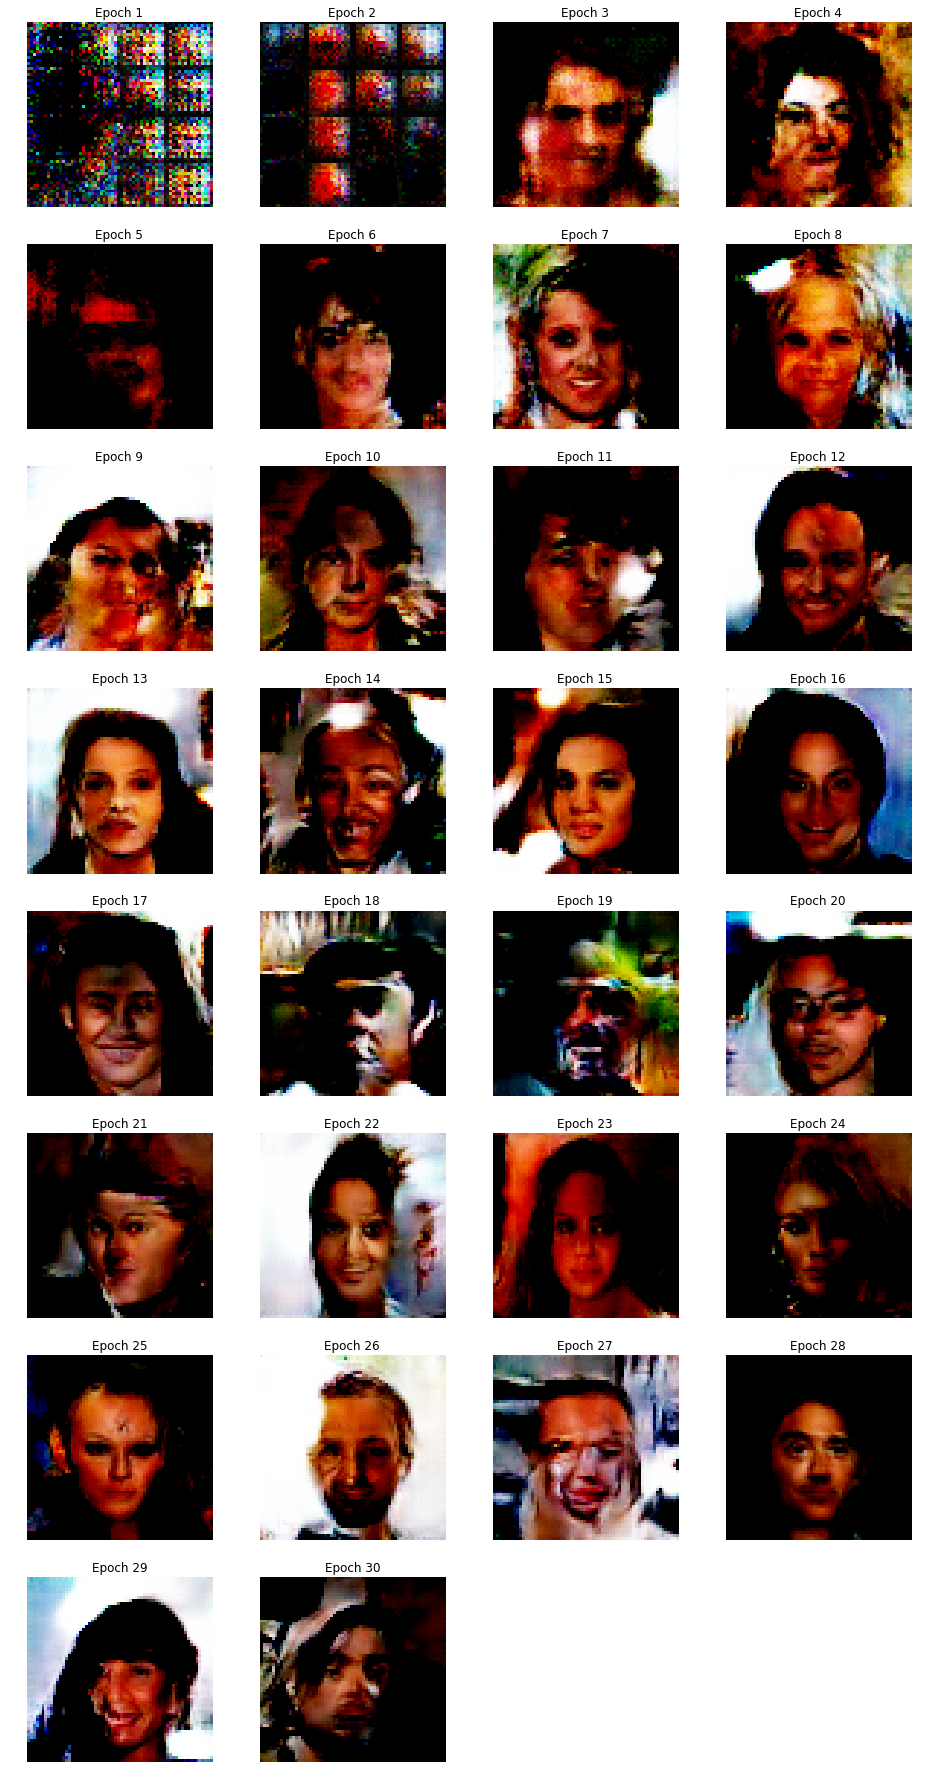

AttributeError: 'NoneType' object has no attribute 'show_results'

In [57]:
learn.fit(30,2e-4)

In [58]:
learn.save('D:/projects/WGAN/GeneratingFaces/w1')

## Results Train 1

In [60]:
learn.load('D:/projects/WGAN/GeneratingFaces/models/w1');

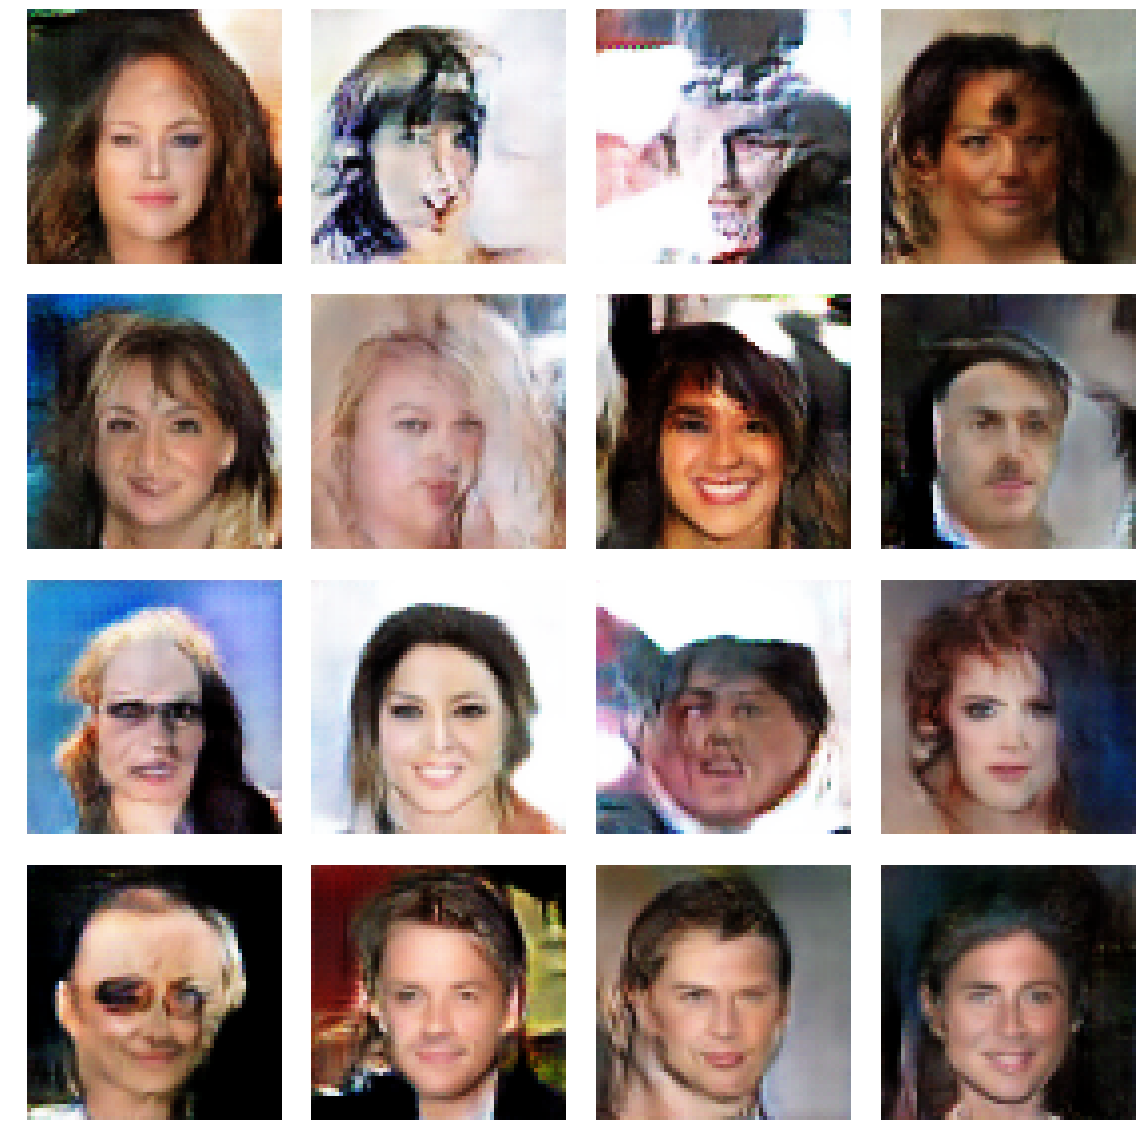

In [62]:
learn.gan_trainer.switch(gen_mode=True)
learn.show_results(ds_type=DatasetType.Train,rows=4)

## Train 2

In [9]:
learn.load('D:/projects/WGAN/GeneratingFaces/models/w1');

epoch,train_loss,gen_loss,disc_loss
1,-0.189021,0.122852,-0.252870
2,-0.201741,0.107371,-0.249229
3,-0.176454,0.124301,-0.245924
4,-0.227237,0.123894,-0.287858
5,-0.446594,0.208981,-0.584484
6,-0.588438,0.394307,-0.796634
7,-0.585232,0.421536,-0.781139
8,-0.660218,0.448593,-0.877107
9,-0.597904,0.417771,-0.810203
10,-0.565721,0.405781,-0.750647


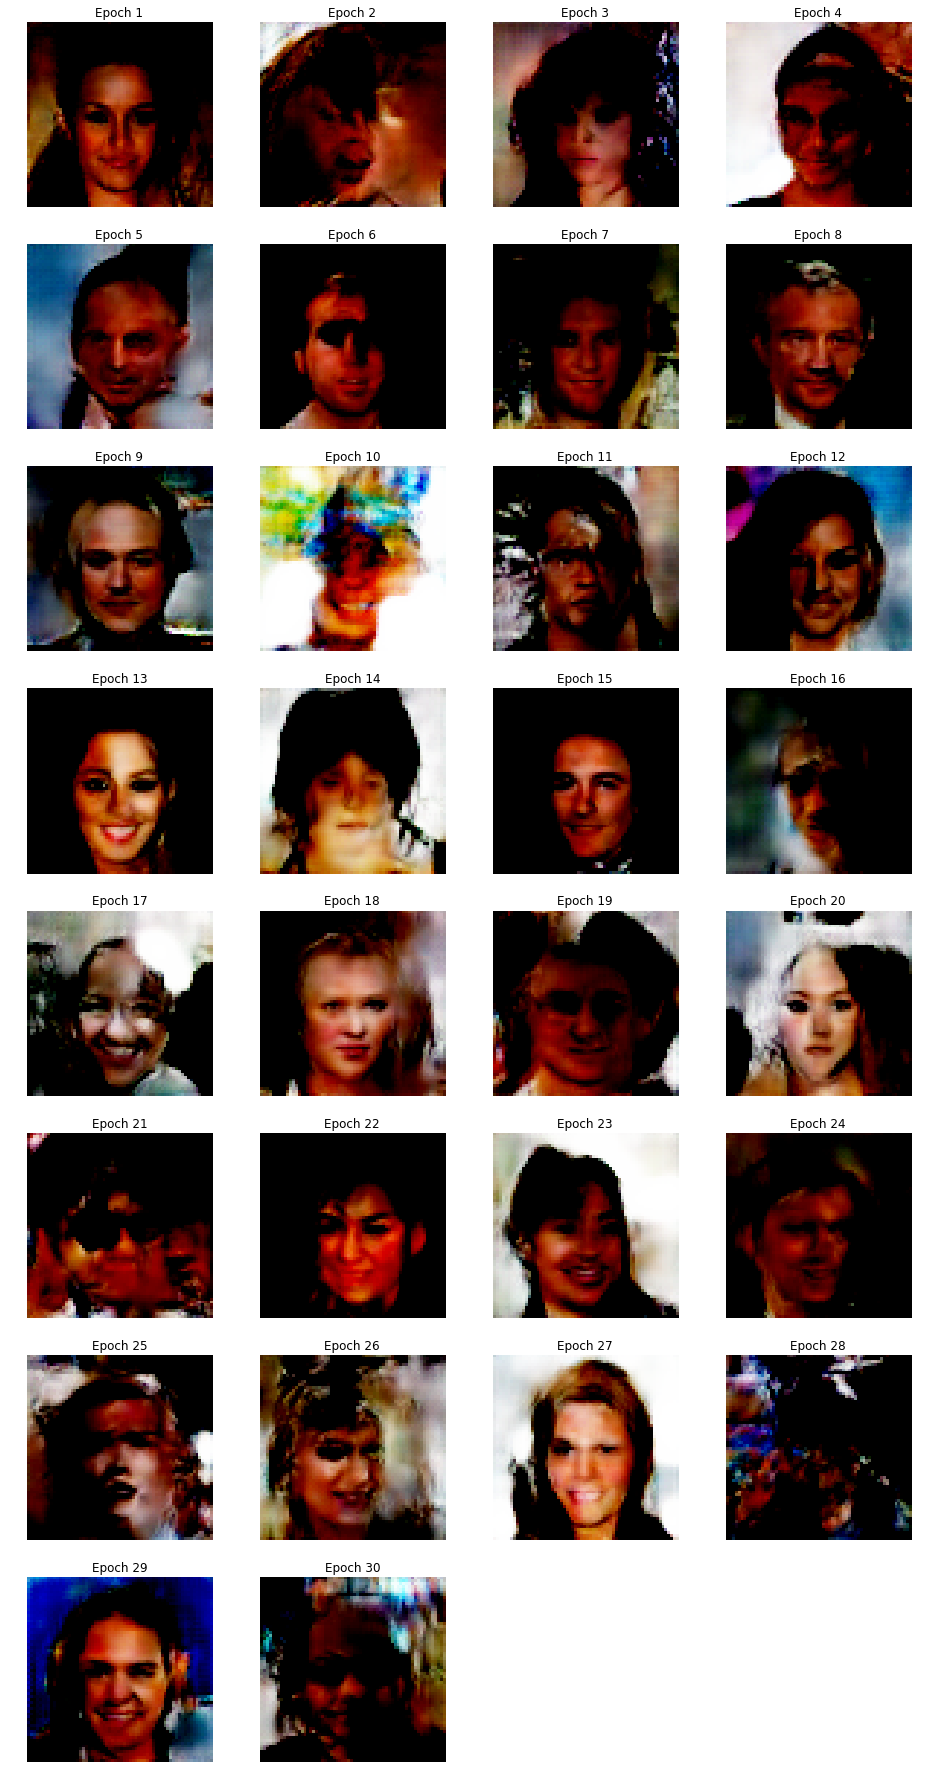

In [66]:
learn.fit(30,2e-4)

In [67]:
learn.save('D:/projects/WGAN/GeneratingFaces/models/w2')

## Results Train 2

In [35]:
learn.load('D:/projects/WGAN/GeneratingFaces/models/w2');

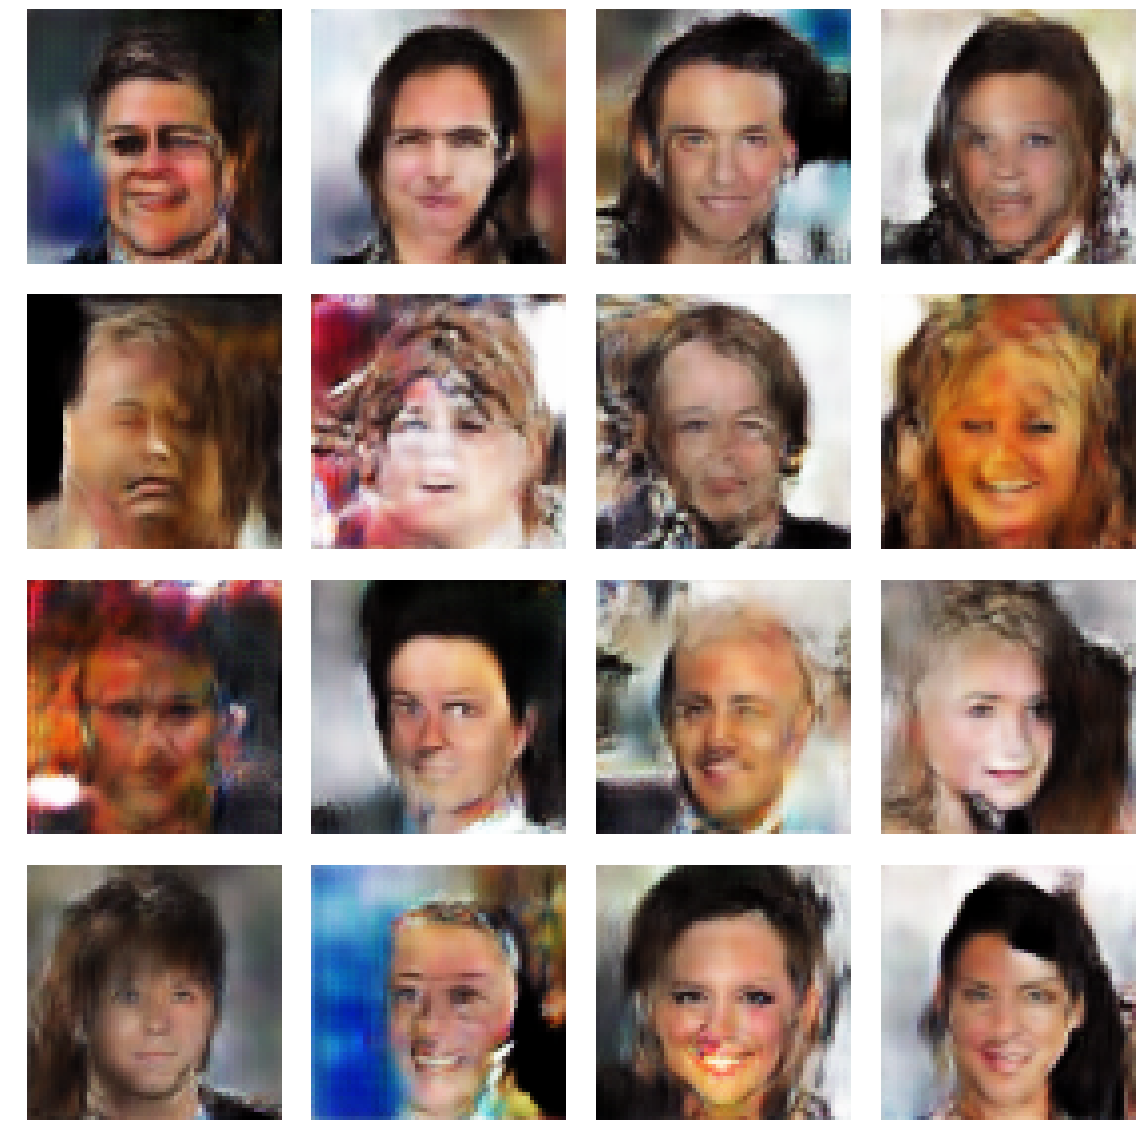

In [36]:
learn.gan_trainer.switch(gen_mode=True)
learn.show_results(ds_type=DatasetType.Train,rows=4)

# End